### Project Description:
For this project I have downloaded a sample dataset of tweets determined to be made by Russian troll accounts. The data was published by FiveThirtyEight and can be found here [3 million Russian troll tweets](https://github.com/fivethirtyeight/russian-troll-tweets)

In order to create a sentiment analysis of the tweets present in the csv, we must first import them and get rid of any non-english content.

In [66]:
import pandas as pd
from textblob import TextBlob
import re

# Read the content of the tweets from the csv
df = pd.read_csv('IRAhandle_tweets_1.csv',usecols=['content','language'])

# Remove non-english content from the dataframe
df.drop(df.index[df['language']!='English'],inplace=True)
df.drop(columns=['language'],inplace=True)


print(df.head(5))

                                             content
0  "We have a sitting Democrat US Senator on tria...
1  Marshawn Lynch arrives to game in anti-Trump s...
2  Daughter of fallen Navy Sailor delivers powerf...
3  JUST IN: President Trump dedicates Presidents ...
4  19,000 RESPECTING our National Anthem! #StandF...


We will then attempt to read the data and generate a sentiment analysis.

In [67]:
amount = len(df['content'])
positive = 0
neutral = 0
negative = 0
sentences = []
for content in df['content']:
    # Clean the tweets by removing tags and links
    sentence = re.sub(r'@\w+','',content)
    sentence = re.sub(r'https?://.+','',sentence)
    sentence = re.sub(r'# ?\w+','',sentence)
    sentences.append(sentence)
    tweet = TextBlob(sentence)
    polarity = tweet.polarity
    
    if polarity>0:
        positive+=1
    elif polarity==0:
        neutral+=1
    elif polarity<0:
        negative+=1

print(f'Of {amount} tweets:')
print('Positive tweets: {} - {:.2f}%'.format(positive,(positive/amount)*100))
print('Neutral tweets: {} - {:.2f}%'.format(neutral,(neutral/amount)*100))
print('Negative tweets: {} - {:.2f}%'.format(negative,(negative/amount)*100))

Of 190252 tweets:
Positive tweets: 55450 - 29.15%
Neutral tweets: 95711 - 50.31%
Negative tweets: 39091 - 20.55%


Now we can calculate popular keywords in the dataset using spacy. Only the first 1000 tweets will be used to conserve memory.

In [78]:
import spacy
nlp = spacy.load("en_core_web_sm")
keywords = nlp(' '.join(sentences[:1000]))
print('Top keywords: ',keywords.ents[:10])

Top keywords:  (Democrat, US, Lynch, Daughter of fallen, Navy, NFL, Trump, Florida, Texas, Puerto Rico)


Visualizing our data outputs with matplotlib:

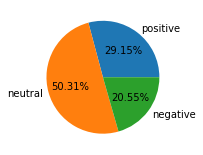

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
labels = 'positive','neutral','negative'
fig,ax = plt.subplots()
ax.pie([positive,neutral,negative], labels=labels, autopct='%1.2f%%')
plt.show()

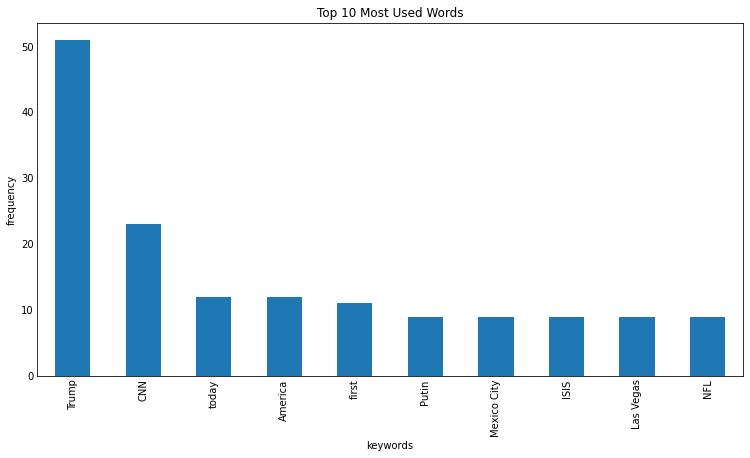

In [107]:
plt.figure(figsize=(10,5))
plt.title('Top 10 Most Used Words')

df = pd.DataFrame([x for x in map(str,keywords.ents)],columns=['keywords'])
df['keywords'].value_counts()[:10].plot(kind='bar',xlabel='keywords',ylabel='frequency')


plt.show()
